In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

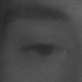

In [ ]:
img=cv2.imread('/content/drive/MyDrive/train/open eyes/s0001_01842_0_0_1_0_0_01.png',0)
cv2_imshow(img)

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 



In [ ]:
model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
base_input=model.layers[0].input
base_output=model.layers[-4].output

In [ ]:
first_layer=tf.keras.layers.Flatten()(base_output)
final_output=tf.keras.layers.Dense(1)(first_layer)
final_output=tf.keras.layers.Activation('sigmoid')(final_output)
new_model=tf.keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


In [ ]:
new_model=tf.keras.models.load_model('/content/my_model.h5')

OSError: ignored

In [ ]:
predictions=new_model.predict('')#give the image url

# **Take Another image**

In [ ]:
img_new=cv2.imread('') #image url

In [ ]:
cv2_imshow('')#image url

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades,'')#give link of xml
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades,'')#give the url
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [ ]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)


In [ ]:
#for drawing rectangle around the eyes
for(x,y,w,h) in eyes:
  cv2.rectangle(img,(x,y),(x+w,y+w),(0,22,0),2)


In [ ]:
#cropping the eyes
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades,'')#give the url
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]
  eyess=eye_cascade.detectMultiScale(roi_gray)
  if len(eyess)==0:
    print("Eyes are not detected")
  else:
    for(ex,ey,ew,eh) in eyess:
      eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

In [1]:
plt.imshow(eyes_roi)

NameError: name 'plt' is not defined

In [ ]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255

In [ ]:
new_model.predict(final_image)